In [1]:
from IPython.core.display import HTML

with open("CSS.css", "r") as file:
    custom_css = file.read()

HTML(custom_css)

In [2]:
import os
import pandas as pd
import numpy as  np
import seaborn as sns
from cycler import cycler
from fnmatch import fnmatch

import matplotlib
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [3]:
palette = ["#3c3744", "#048BA8", "#EE6352", "#E1BB80", "#78BC61"]
grey_palette = ["#8e8e93", "#636366", "#48484a", "#3a3a3c", "#2c2c2e", "#1c1c27"]

bg_color = "#F6F5F5"
white_color = "#d1d1d6"

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.spines.left": False,
    "grid.alpha": 0.2,
    "figure.figsize": (16, 6),
    "axes.titlesize": "large",
    "axes.labelsize": "large",
    "ytick.labelsize": "medium",
    "xtick.labelsize": "medium",
    "legend.fontsize": "large",
    "lines.linewidth": 1,
    "axes.prop_cycle": cycler("color", palette),
    "figure.facecolor": bg_color,
    "figure.edgecolor": bg_color,
    "axes.facecolor": bg_color,
    "text.color": grey_palette[1],
    "axes.labelcolor": grey_palette[1],
    "axes.edgecolor": grey_palette[1],
    "xtick.color": grey_palette[1],
    "ytick.color": grey_palette[1],
    "figure.dpi": 150,
}

sns.set_theme(style="whitegrid", palette=sns.color_palette(palette), rc=custom_params)

# EDA

## Data

In [4]:
def scan(root, pattern="*.csv", verbose=0):
        res = []
        for path, subdirs, files in os.walk(root):
            for name in files:
                if fnmatch(name, pattern):
                    r = os.path.join(path, name)
                    res.append(r)
                    if verbose == 1:
                        print(r)
        return res

In [5]:
path = scan(root="./dataset", pattern="*.xlsx")
dataframe = [f'df{i}' for i in range(1, len(path)+1)]

In [6]:
names = []
all_data = pd.DataFrame()
for i, item in enumerate(path):
    for df in dataframe:
        df = pd.read_excel(item)
        all_data = all_data.append(df, ignore_index=True)


In [7]:
all_data

,timestamp,x,y,z,label
0,1657093314320,3,239,34,1
1,1657093314360,9,247,30,1
2,1657093314400,8,252,31,1
3,1657093314440,0,255,37,1
4,1657093314480,-12,252,39,1
...,...,...,...,...,...
198739,1657093314120,-2,243,38,0
198740,1657093314160,-3,248,43,0
198741,1657093314200,-2,250,46,0
198742,1657093314240,0,251,45,0


## Label

In [8]:
dat = all_data.copy()
target = dat.pop('label')
print('\nRaw')
print(target.value_counts(True))


Raw
1    0.5
0    0.5
Name: label, dtype: float64


## Bentuk data

In [9]:
print('Raw shape:            ', all_data.shape)

Raw shape:             (198744, 5)


## Duplikasi

In [10]:
print('Duplicates on Raw:        ', all_data.duplicated().sum())

Duplicates on Raw:         170352


## Info umum

In [11]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198744 entries, 0 to 198743
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   timestamp  198744 non-null  int64
 1   x          198744 non-null  int64
 2   y          198744 non-null  int64
 3   z          198744 non-null  int64
 4   label      198744 non-null  int64
dtypes: int64(5)
memory usage: 7.6 MB
None


## Statistika Deskriptif

In [12]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,198744.0,1.657094e+12,327843.401442,1.657093e+12,1.657093e+12,1.657094e+12,1.657094e+12,1.657094e+12
x,198744.0,-7.664835e-01,6.894984,-9.700000e+01,-2.000000e+00,0.000000e+00,1.000000e+00,1.900000e+02
y,198744.0,2.455755e+02,8.203070,1.690000e+02,2.430000e+02,2.460000e+02,2.490000e+02,3.940000e+02
z,198744.0,4.189374e+01,7.872780,-4.800000e+01,3.800000e+01,4.200000e+01,4.500000e+01,3.520000e+02
label,198744.0,5.000000e-01,0.500001,0.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00


## Durasi makan ikan

In [13]:
def eat_duration(dfs, path):
    dict_data = {}
    list_duration = []
    for i, item in enumerate(path):
        for df in dfs:
            dict_data[df] = pd.read_excel(item)
            dict_data[df]['date'] = pd.to_datetime(dict_data[df]['timestamp'], unit='ms')
        first_duration = dict_data[df]['timestamp'].iloc[0]
        for i, d in dict_data[df].iterrows():
            if d['label'] == 1.0:
                last_duration = d.iat[0]
        duration = last_duration - first_duration
        list_duration.append(duration)
    all_duration_data = pd.to_timedelta(list_duration, unit="ms")
    mean_duration = pd.to_timedelta(sum(list_duration)/len(dict_data), unit='ms')
    return all_duration_data, mean_duration
    
duration_data, mean_data = eat_duration(dfs = dataframe, path = path)
for i, item in enumerate(duration_data):
    print(f"duration_eat_data{i} - {item}")
print(f"mean_duration_eat_data: {mean_data}")

    

duration_eat_data0 - 0 days 00:01:43.960000
duration_eat_data1 - 0 days 00:01:31.480000
duration_eat_data2 - 0 days 00:01:14.840000
duration_eat_data3 - 0 days 00:01:50.200000
duration_eat_data4 - 0 days 00:01:12.760000
duration_eat_data5 - 0 days 00:00:58.200000
duration_eat_data6 - 0 days 00:00:56.120000
mean_duration_eat_data: 0 days 00:01:21.080000


## Analisa Univariate

### Kdeplot

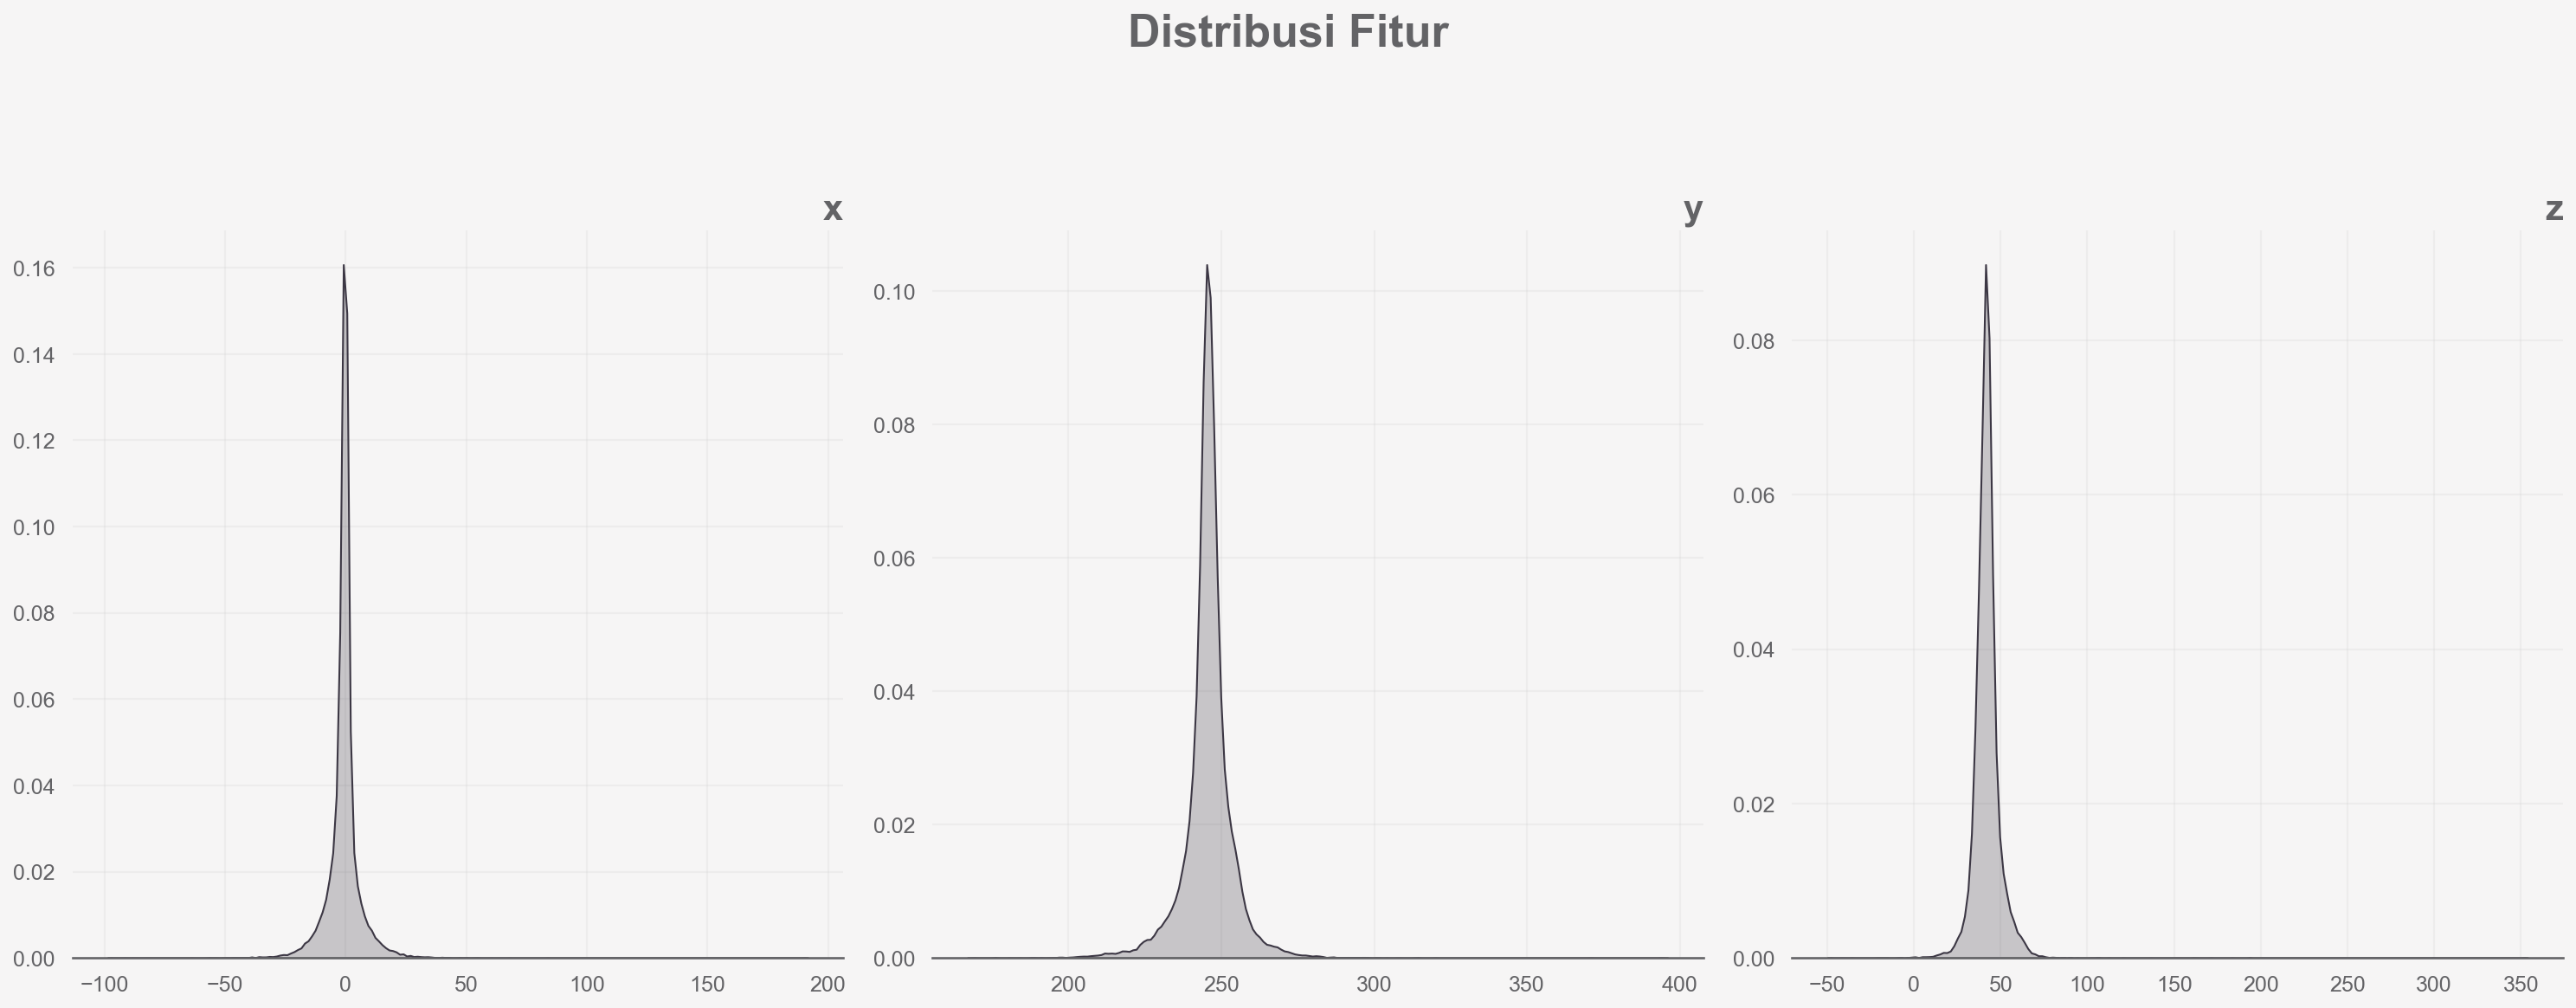

In [14]:
COL = ['x', 'y', 'z']
fig = plt.figure(figsize=(20, 20), dpi=150)
for i, item in enumerate(COL):
    ax = plt.subplot(3, 3, i + 1)
    sns.kdeplot(
        data = all_data, fill=True,
        x = item, palette=palette[:2], legend=False
    )       
    ax.set_ylabel(''); ax.spines['top'].set_visible(False), 
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{item}', loc='right', 
                 weight='bold', fontsize=20)
                 
fig.suptitle(f'Distribusi Fitur\n\n\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()
    

## Analisa Multivariate

In [15]:
melt = all_data.copy()
melt = melt.drop(columns=list(melt)[0])
data_melt = pd.melt(melt, id_vars="label", value_vars=list(melt)[:-1])

melt

,x,y,z,label
0,3,239,34,1
1,9,247,30,1
2,8,252,31,1
3,0,255,37,1
4,-12,252,39,1
...,...,...,...,...
198739,-2,243,38,0
198740,-3,248,43,0
198741,-2,250,46,0
198742,0,251,45,0


### Boxplot

Text(0.5, 0.98, 'Distribusi Fitur Dengan Label\n\n\n')

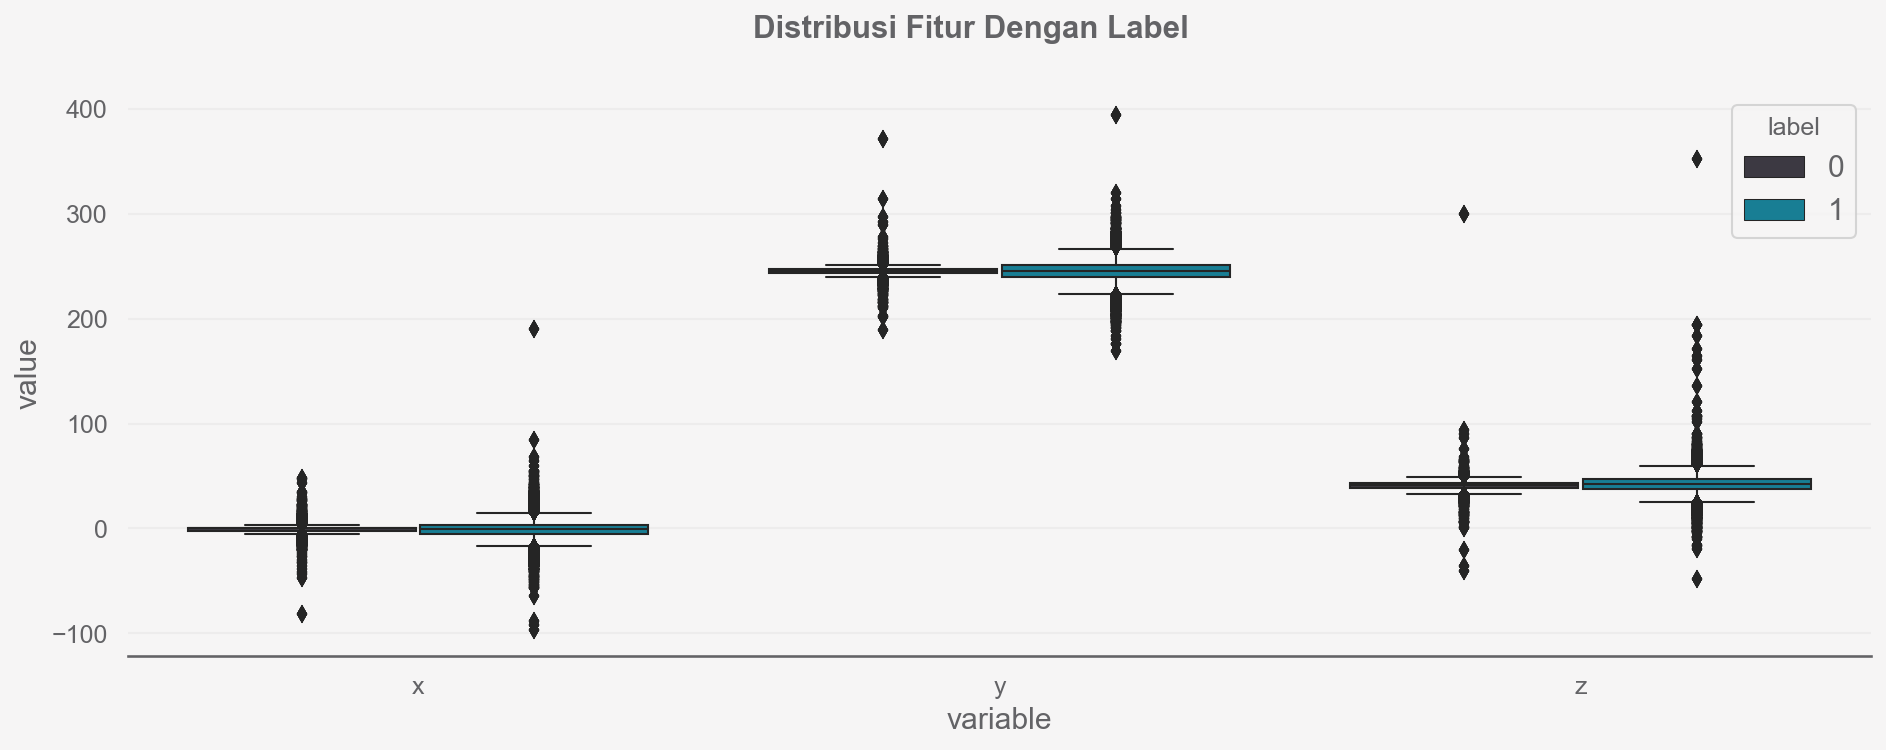

In [16]:
fig, ax = plt.subplots(figsize=[15, 5])
ax = sns.boxplot(
    data = data_melt, 
    x = "variable", 
    y = "value", 
    hue = "label")
L = ax.legend(loc=1)
ax.legend_.set_title("label")
L.get_texts()[0]
L.get_texts()[1]
fig.suptitle(f'Distribusi Fitur Dengan Label\n\n\n', ha='center',  fontweight='bold', fontsize=15)

### Kdeplot

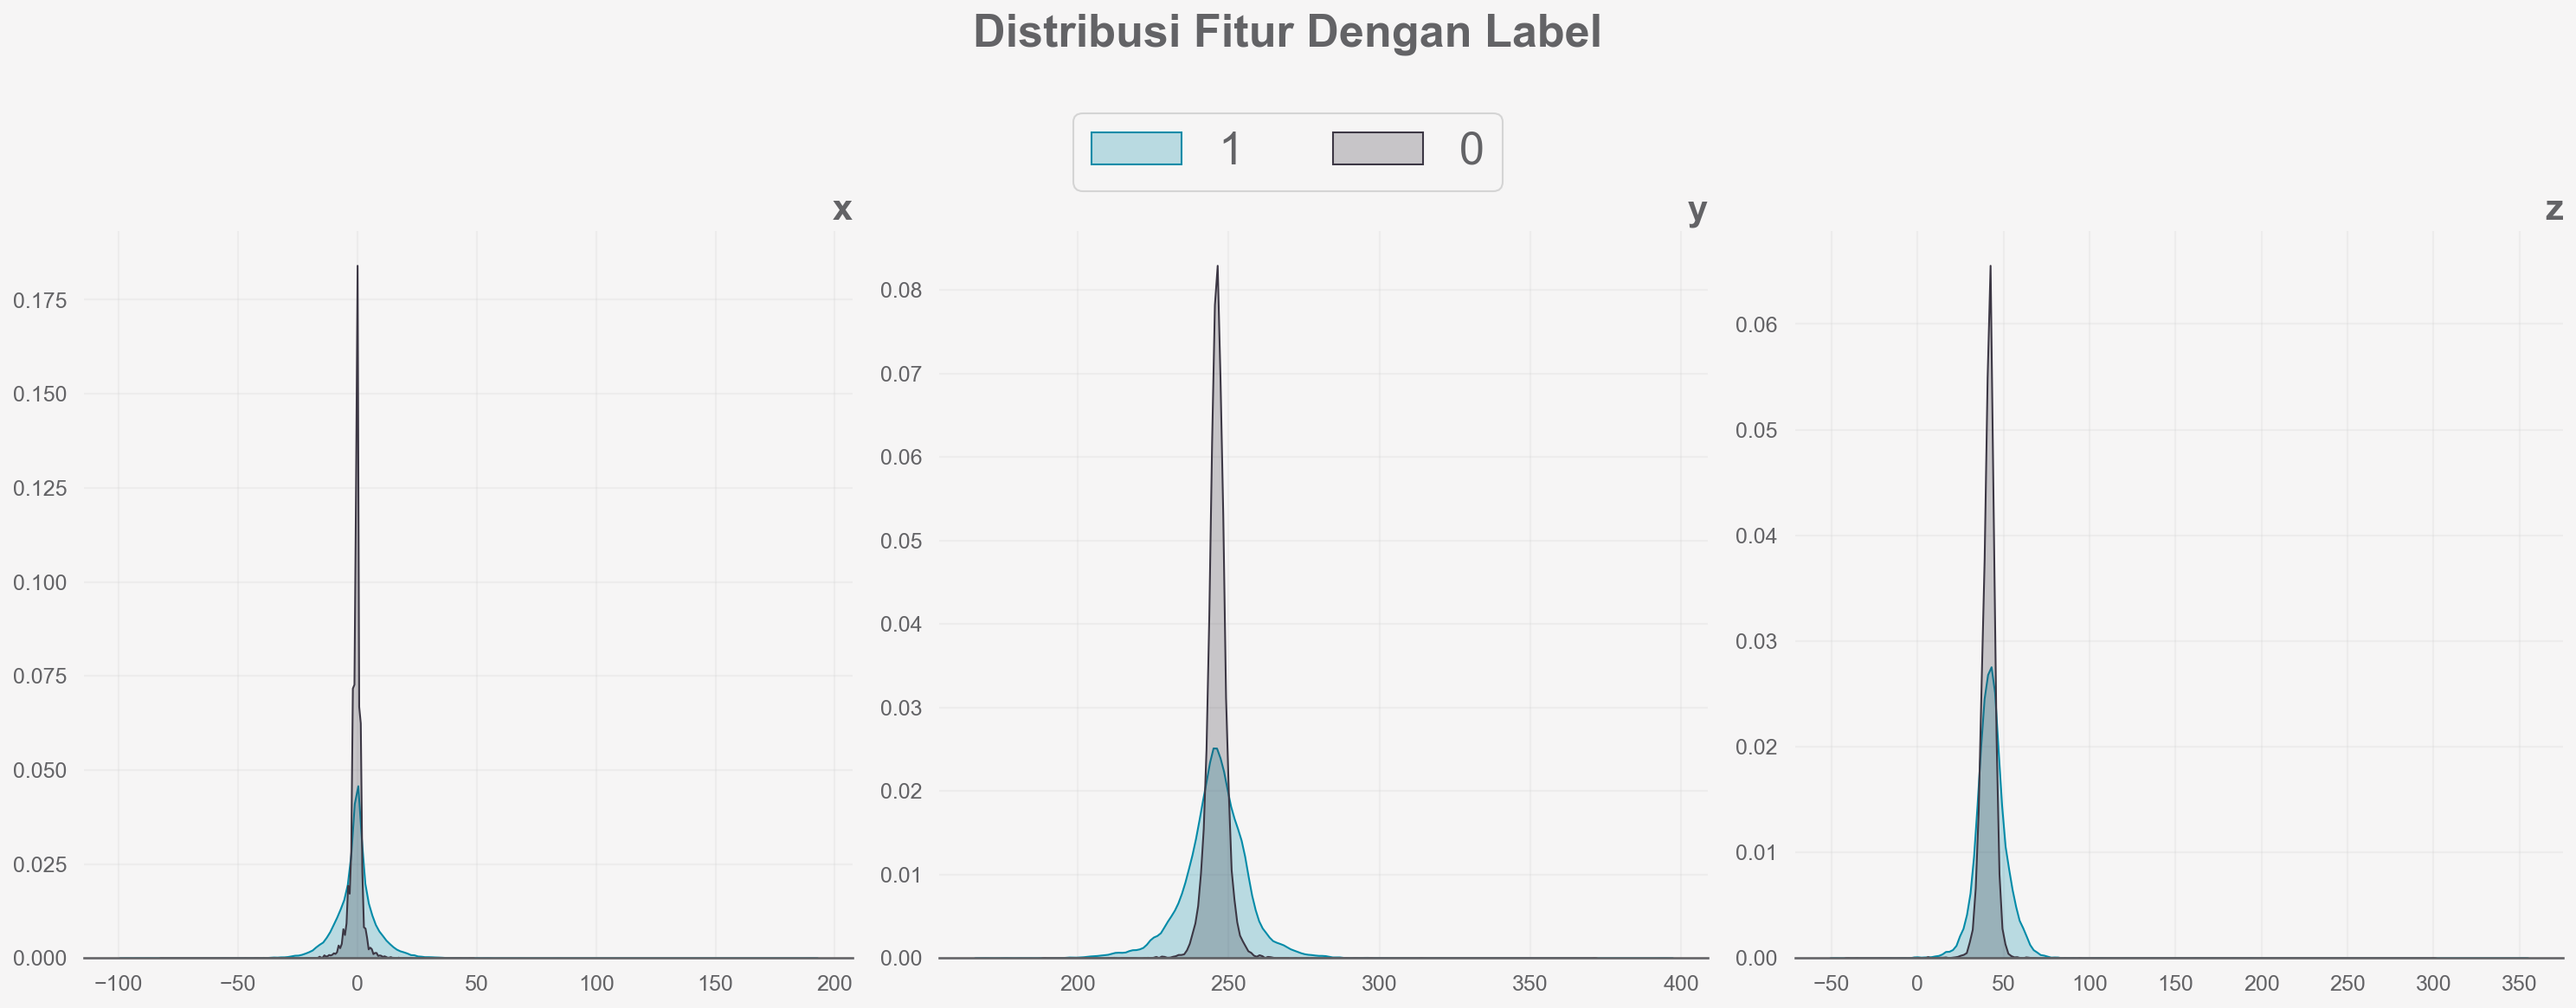

In [17]:
fig = plt.figure(figsize=(20, 20), dpi=150)
for idx, col in enumerate(COL):
    ax = plt.subplot(3, 3, idx + 1)
    sns.kdeplot(
        data = all_data, hue = 'label', fill=True,
        x = col, palette=palette[:2], legend=False
    )
            
    ax.set_ylabel(''); ax.spines['top'].set_visible(False), 
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right', 
                 weight='bold', fontsize=20)
                 
fig.suptitle(f'Distribusi Fitur Dengan Label\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend([1, 0], loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize=25, ncol=3)
plt.tight_layout()

### Pairplot

Text(0.5, 0.98, 'Distribusi Antar Fitur Dan Label\n\n\n')

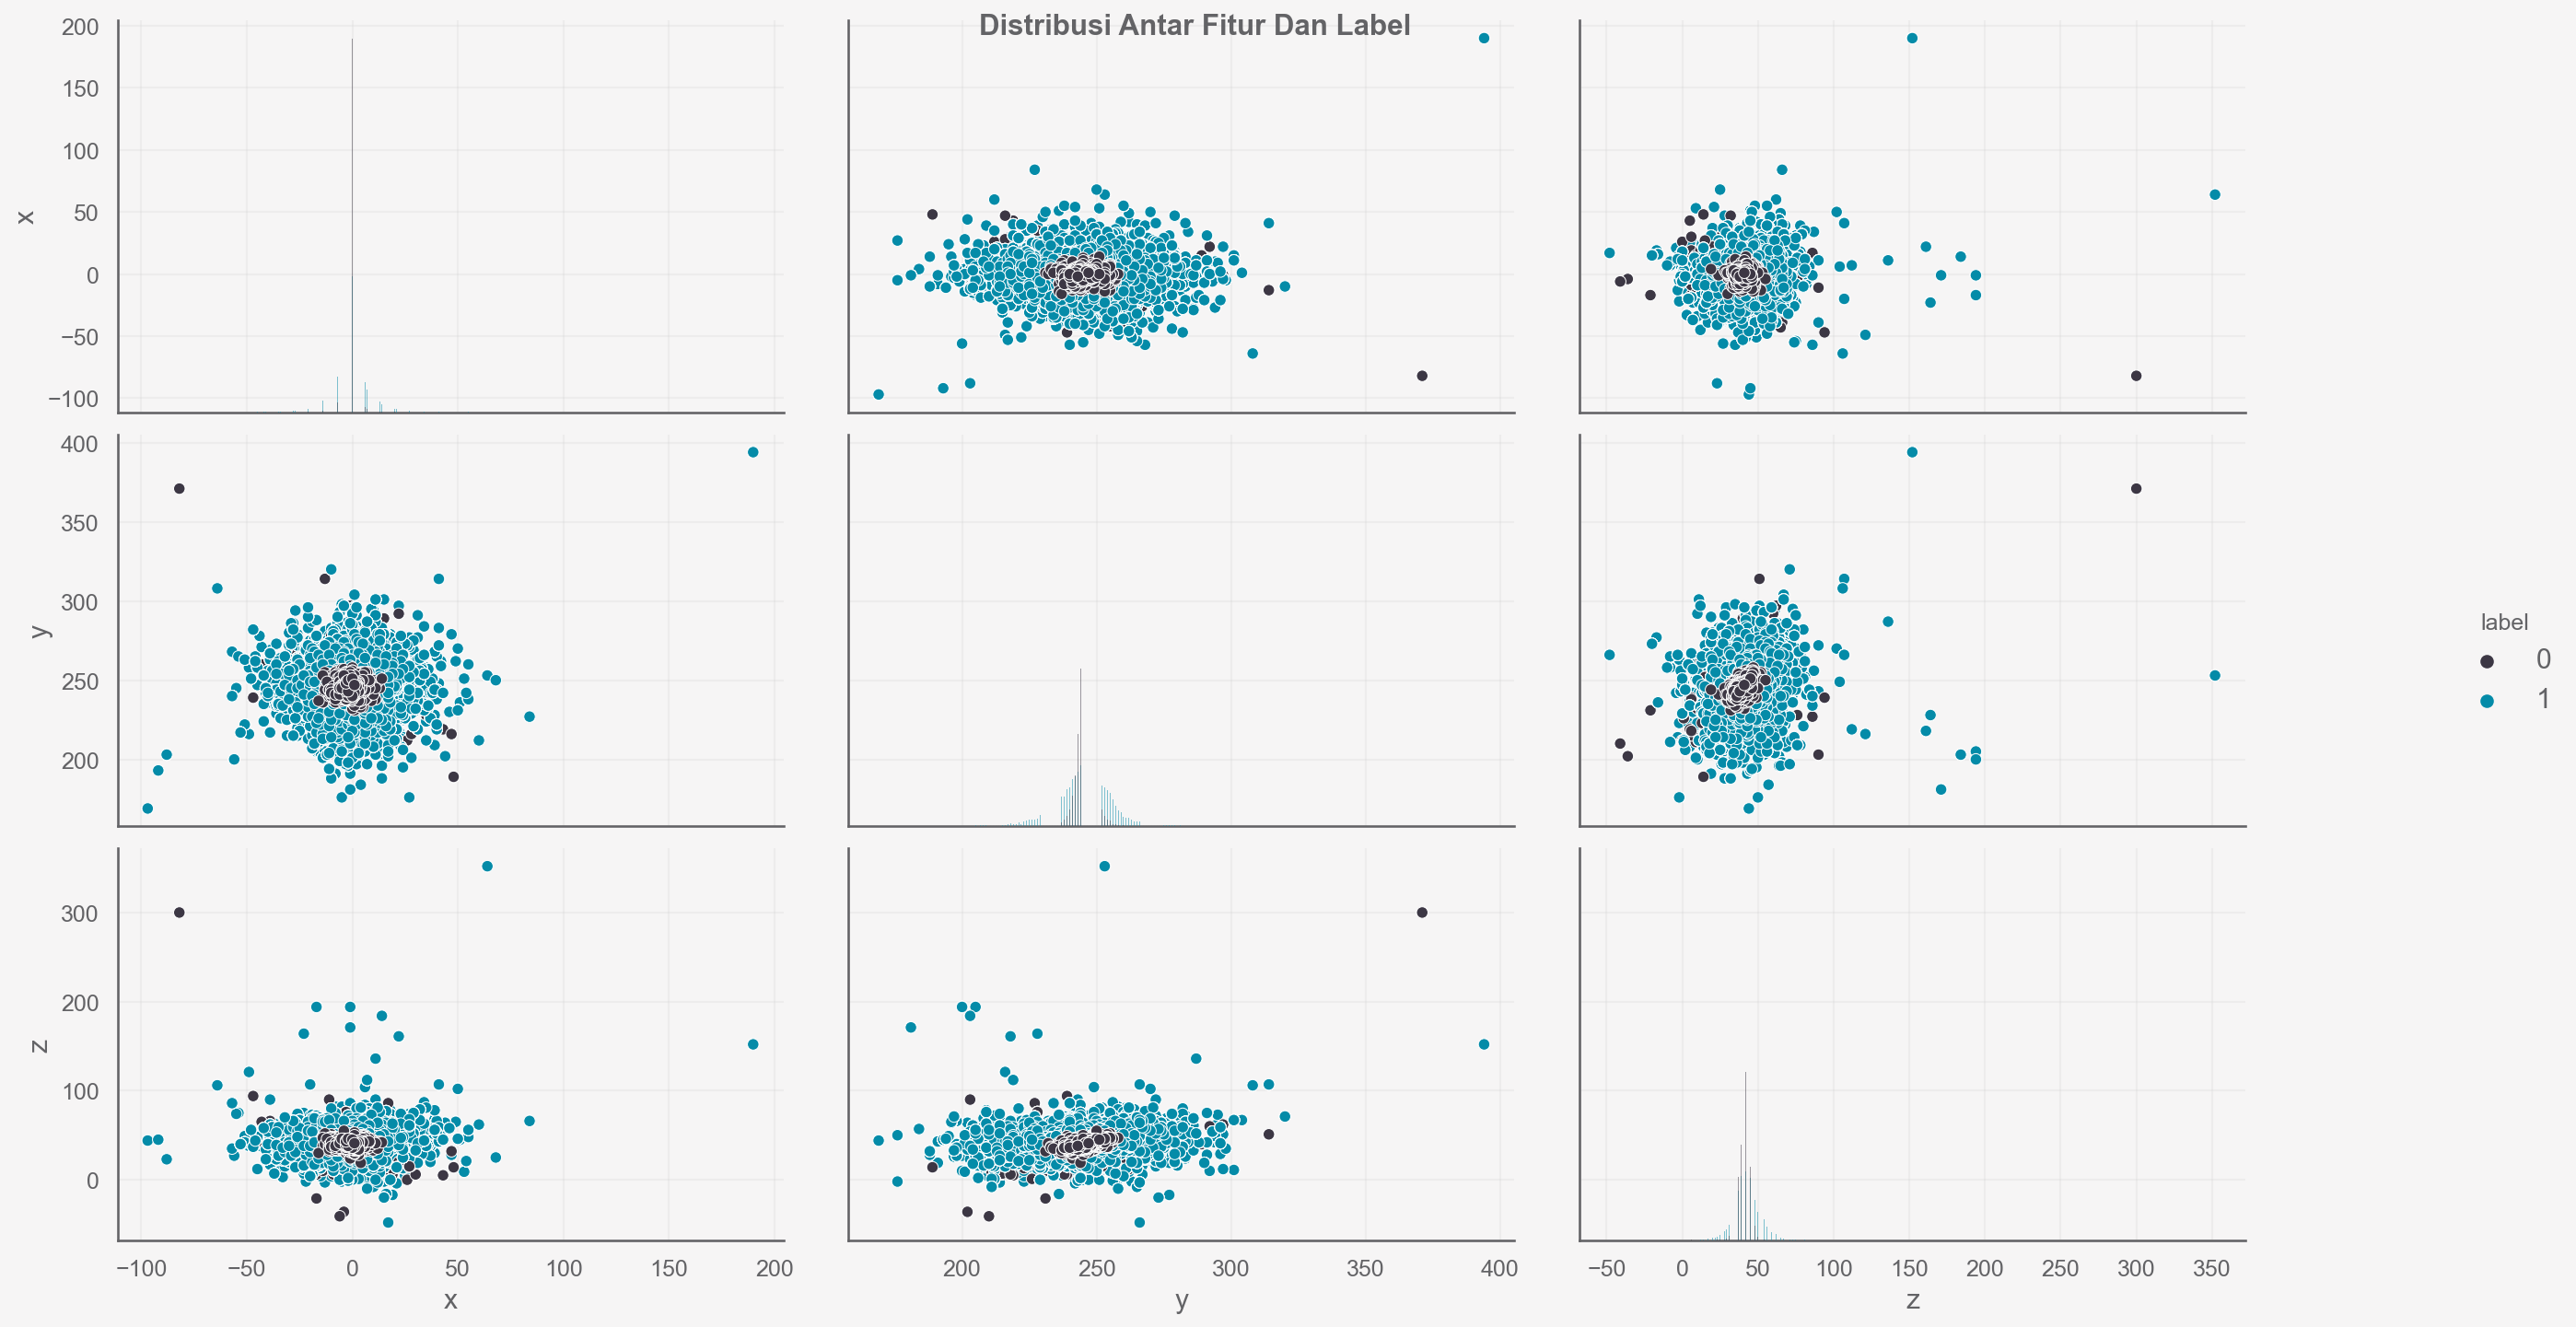

In [18]:
pair = sns.pairplot(melt, hue='label', diag_kind="hist")
pair.fig.set_size_inches(20,10)
pair.fig.suptitle(f'Distribusi Antar Fitur Dan Label\n\n\n', ha='center',  fontweight='bold', fontsize=15)


### Uji Normalitas

In [19]:
melt_eat = melt[melt.label.isin([1])].reset_index(drop=True)
melt_fast = melt[melt.label.isin([0])].reset_index(drop=True)

In [20]:
from scipy.stats import kstest
cm = sns.light_palette(palette[1], as_cmap=True)

eat_ks = {}
fast_ks = {}

for feature in COL:
    eat_feature = melt_eat[feature]
    fast_feature = melt_fast[feature]
    
    eat_ks[feature] = kstest(eat_feature, "norm")
    fast_ks[feature] = kstest(fast_feature, "norm")
    

print('Fish Eating')
display(pd.DataFrame.from_dict(
    eat_ks, orient='index'
).style.background_gradient(cmap=cm))

print('Fish Fasting')
display(pd.DataFrame.from_dict(
    fast_ks, orient='index'
).style.background_gradient(cmap=cm))


Fish Eating


,statistic,pvalue
x,0.386309,0.000000
y,1.000000,0.000000
z,0.998066,0.000000


Fish Fasting


,statistic,pvalue
x,0.336555,0.000000
y,1.000000,0.000000
z,0.999648,0.000000


### Uji Korelasi Fitur

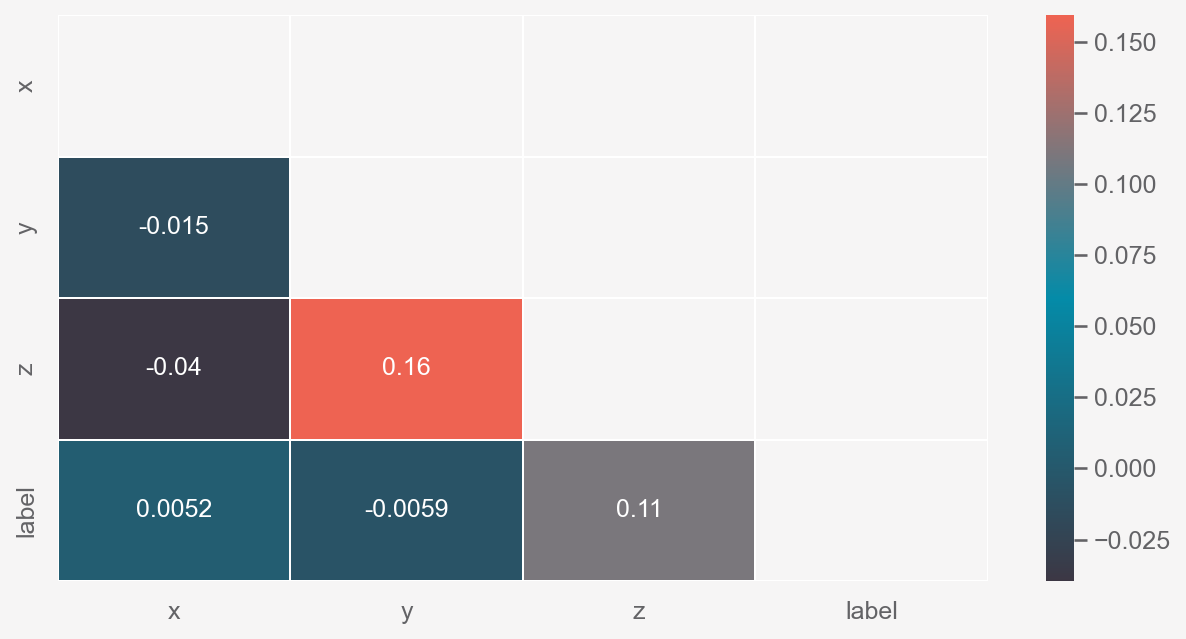

In [21]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", palette[:3])
corr = melt.corr(method="spearman")
fig, axes = plt.subplots(figsize=(10, 5))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, cmap=cmap, annot=True)
plt.show()

## Analisa Klasifikasi

Text(0, 0.5, 'T-SNE Dim2')

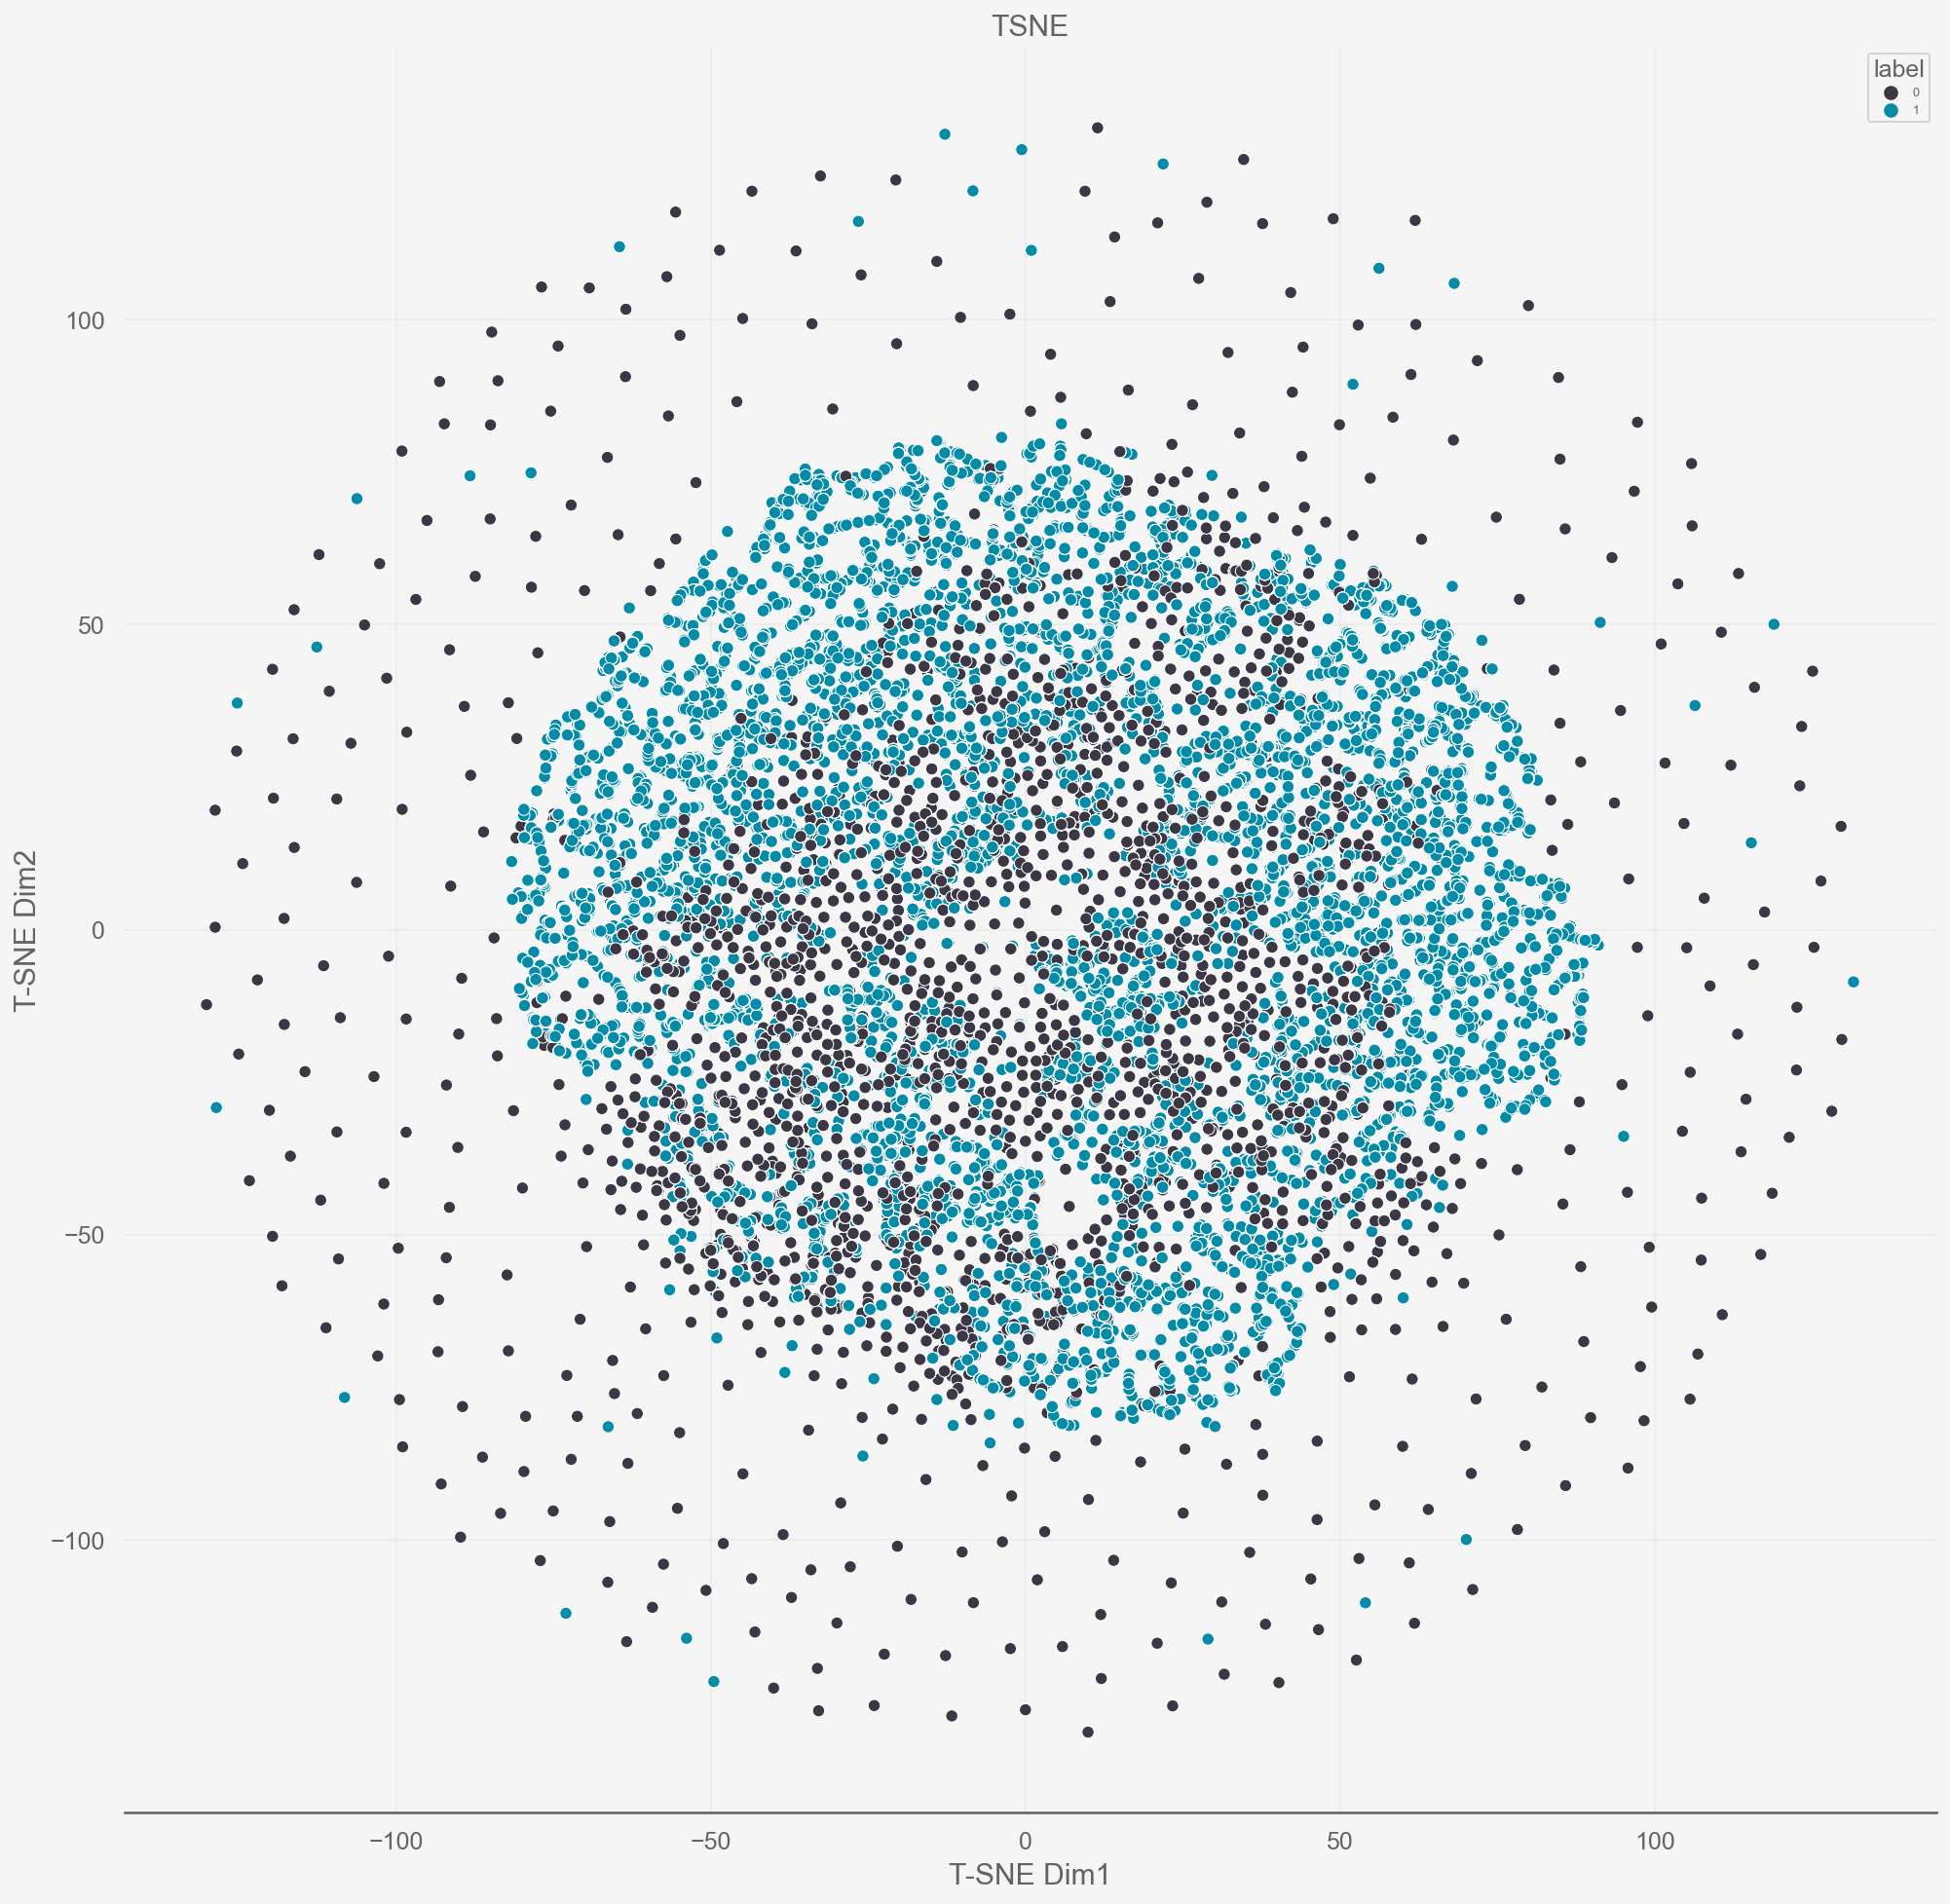

In [22]:
melt_no_label = melt.copy()
melt_no_label = melt.drop(columns=list(melt)[3])

from openTSNE import TSNE

tsne = TSNE()
train_tsne = tsne.fit(melt_no_label.to_numpy())
fig, ax = plt.subplots(figsize=(16, 16))
sns.scatterplot(x=train_tsne[:, 0], y=train_tsne[:, 1], hue=target, ax=ax)
ax.legend(fontsize=6, title='label')
ax.set_title('TSNE')
ax.set_xlabel("T-SNE Dim1")
ax.set_ylabel("T-SNE Dim2")

In [23]:
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
grn = Style.BRIGHT + Fore.GREEN
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import log_loss

from collections import Counter

In [24]:
def train_test(logs, frac, random_state=None):
    log_train = logs.sample(frac=frac, random_state=random_state)
    ind_train = list(log_train.index)
    ind_test = [i for i in range(len(logs)) if i not in ind_train]
    log_test = logs.iloc[ind_test]
    log_train.reset_index(drop=True, inplace=True)
    log_test.reset_index(drop=True, inplace=True)
    return log_train, log_test

In [25]:
seed = 0

train, test = train_test(melt, 0.8, seed)
print(Counter(train.label))

Counter({0: 79580, 1: 79415})


In [26]:
def get_mean_score(oof: np.array):
    oof = pd.DataFrame(np.concatenate(oof), columns=['id', 'preds', 'target']).set_index('id')
    oof.index = oof.index.astype(int)
    mean_val_score = log_loss(oof.target, oof.preds)
    return mean_val_score

In [45]:
import xgboost as xgb
from xgboost.callback import EarlyStopping

config = {'SEED': 0,
          'FOLDS': 15,
          'N_ESTIMATORS': 100}

params = {'max_depth': 8,
          'learning_rate': 0.01,
          'n_jobs': -1,
          'objective': 'binary:logistic',
          'early_stopping_rounds': 150,
          'verbosity': 0,
          'eval_metric': 'logloss'}


X, y = melt.drop(columns=['label']), melt.label
cv = model_selection.StratifiedKFold(n_splits=config['FOLDS'],
                                     shuffle=True,
                                     random_state=config['SEED'])

feature_importances_ = pd.DataFrame(index=melt_no_label.columns)
eval_results_ = {}
models_ = []
oof = []

for fold, (fit_idx, val_idx) in enumerate(cv.split(X, y)):
    if (fold + 1) % 5 == 0 or (fold + 1) == 1:
        print(f'{"#" * 24} Training FOLD {fold + 1} {"#" * 24}')

    X_fit = X.iloc[fit_idx]
    X_val = X.iloc[val_idx]
    y_fit = y.iloc[fit_idx]
    y_val = y.iloc[val_idx]

    fit_set = xgb.DMatrix(X_fit, y_fit)
    val_set = xgb.DMatrix(X_val, y_val)
    watchlist = [(fit_set, 'fit'), (val_set, 'val')]

    eval_results_[fold] = {}
    model = xgb.train(num_boost_round=config['N_ESTIMATORS'],
                      params=params,
                      dtrain=fit_set,
                      evals=watchlist,
                      evals_result=eval_results_[fold],
                      verbose_eval=False,
                      callbacks=[EarlyStopping(params['early_stopping_rounds'],
                                               data_name='val', save_best=True)])

    val_preds = model.predict(val_set)
    val_score = log_loss(y_val, val_preds)
    best_iter = model.best_iteration

    idx_pred_target = np.vstack([val_idx, val_preds, y_val]).T  
    print(f'{" " * 15} LogLoss:{blu}{val_score:.5f}{res} {" " * 6} best iteration  :{blu}{best_iter}{res}')
    
    oof.append(idx_pred_target)

    feature_importances_[f'gain_{fold}'] = model.get_score(importance_type='gain').values()
    feature_importances_[f'split_{fold}'] = model.get_score(importance_type='weight').values()

    models_.append(model)

mean_val_rmse = get_mean_score(oof)
print(f'{"*" * 45}\n{red}Mean{res} LogLoss: {red}{mean_val_rmse:.5f}')

######################## Training FOLD 1 ########################
                LogLoss:0.48654        best iteration  :99
                LogLoss:0.48050        best iteration  :99
                LogLoss:0.48264        best iteration  :99
                LogLoss:0.47950        best iteration  :99
######################## Training FOLD 5 ########################
                LogLoss:0.48554        best iteration  :99
                LogLoss:0.47950        best iteration  :99
                LogLoss:0.48492        best iteration  :99
                LogLoss:0.48742        best iteration  :99
                LogLoss:0.48357        best iteration  :99
######################## Training FOLD 10 ########################
                LogLoss:0.48172        best iteration  :99
                LogLoss:0.48328        best iteration  :99
                LogLoss:0.48334        best iteration  :99
                LogLoss:0.48125        best iteration  :99
                LogLoss:0.48754   

Text(0.5, 1.0, 'Feature Importance')

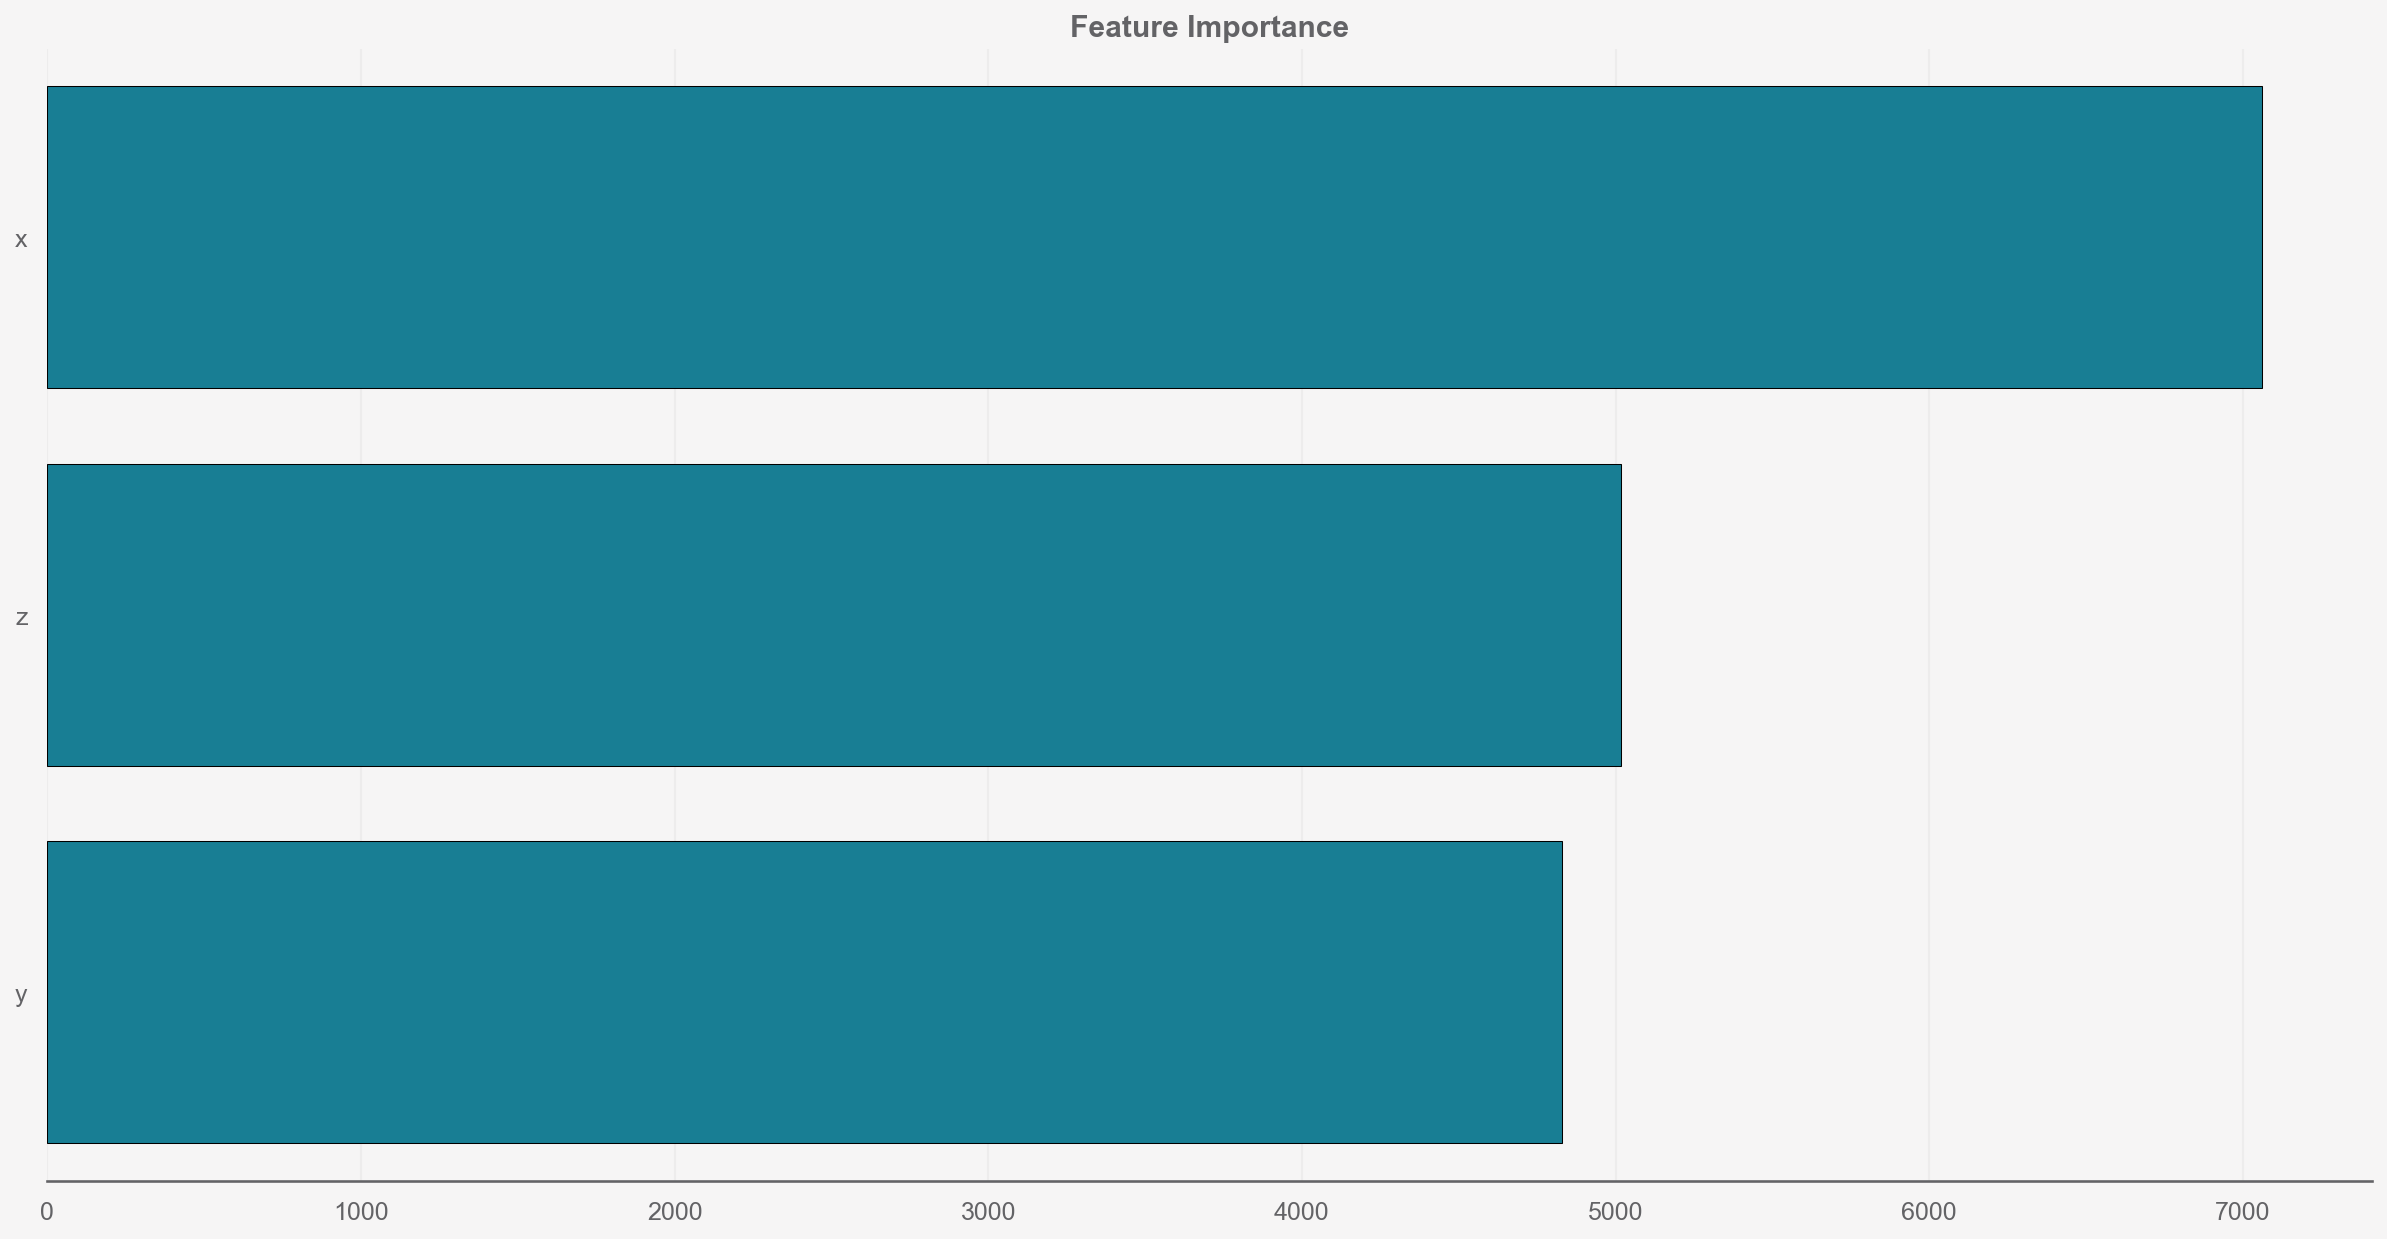

In [46]:
fi = feature_importances_
fi_gain = fi[[col for col in fi.columns if col.startswith('gain')]].mean(axis=1)
fi_splt = fi[[col for col in fi.columns if col.startswith('split')]].mean(axis=1)

fig, ax = plt.subplots(figsize=(20, 10), dpi=150)
data_splt = fi_splt.sort_values(ascending=False)
sns.barplot(x=data_splt.values, y=data_splt.index, 
            color=palette[1], linestyle="-",
            linewidth=0.5, edgecolor="black", ax=ax)
ax.set_title(f'Feature Importance', fontdict={'fontweight': 'bold'})

              precision    recall  f1-score   support

           0       0.78      0.85      0.82     99372
           1       0.84      0.76      0.80     99372

    accuracy                           0.81    198744
   macro avg       0.81      0.81      0.81    198744
weighted avg       0.81      0.81      0.81    198744



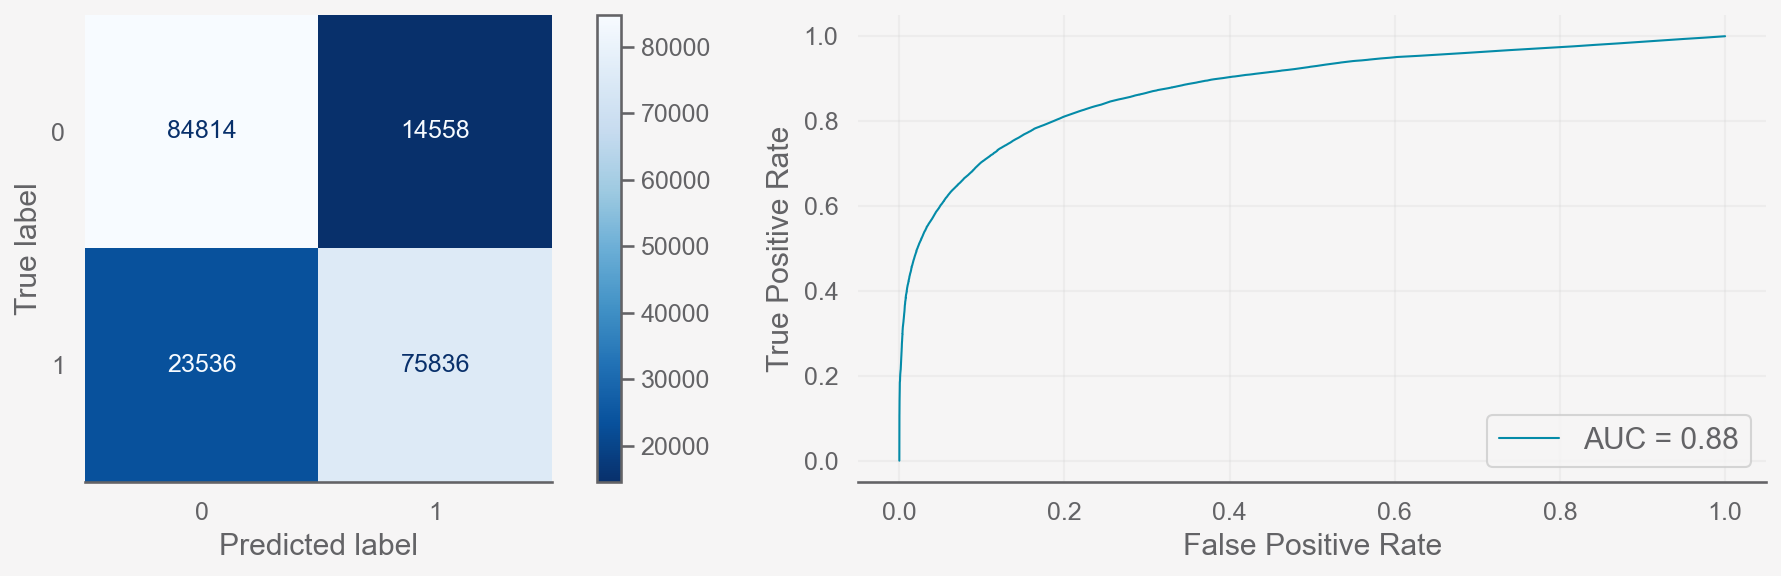

In [47]:
from sklearn import metrics
def show_confusion_roc(oof: list) -> None:    
    f, ax = plt.subplots(1, 2, figsize=(13.3, 4))
    df = pd.DataFrame(np.concatenate(oof), columns=['id', 'preds', 'target']).set_index('id')
    df.index = df.index.astype(int)
    cm = confusion_matrix(df.target, df.preds.ge(0.5).astype(int))
    cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues_r', ax=ax[0], values_format='5g')
    ax[0].grid(False)
    fpr, tpr, thresholds = metrics.roc_curve(df.target, df.preds)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display.plot(ax=ax[1], color=palette[1])  
    # RocCurveDisplay.from_predictions(df.target, df.preds, color=palette[1], ax=ax[1])
    plt.tight_layout()
    print(classification_report(df.target, df.preds.ge(0.5).astype(int), labels=[0, 1]))
show_confusion_roc(oof)
